# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [7]:
#Read in data from source 
df_raw = pd.read_csv("C:/Users/AMKT086/Documents/Data Science Course/dat6melb_students/unit-project-02/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [8]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are total of 4 observations in the dataset

#### Question 2. Create a summary table

In [26]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: A standard deviation close to 0 indicates that the data points tend to be very close to the mean of the datasets. While high standard deviation indicates that the data points are spread out over a wider range of the values

From the summary table above, gre standard deviation is way above 0 which means gre data points are spread out with majority of the gre data were located away from mean (expected value) of the set. Whereas GPA data are close to 0 which indicates the data points are very close to the mean of the datasets.

#### Question 4. Drop data points with missing data


In [47]:
# Check if there's any NA values
df_raw.isnull().any()

#Count NA in datasets
df_raw.isnull().sum()

df_dropNA = df_raw.dropna()
df_dropNA.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [48]:
#Check if NA has been remove
df_dropNA.isnull().any()

admit       False
gre         False
gpa         False
prestige    False
dtype: bool

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Running the query above, the output shows there's no NA in all 4 variables.

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x12580d30>],
 'caps': [<matplotlib.lines.Line2D at 0x12585780>,
 'fliers': [<matplotlib.lines.Line2D at 0x1258a438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12585fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12580e80>,
  <matplotlib.lines.Line2D at 0x12585358>]}

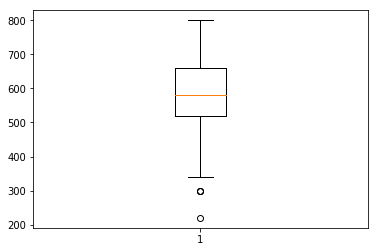

In [54]:
#boxplot 1
df = df_dropNA
plt.boxplot(df["gre"])

{'boxes': [<matplotlib.lines.Line2D at 0x12527518>],
 'caps': [<matplotlib.lines.Line2D at 0x12527f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x12537be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x125377b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12527668>,
  <matplotlib.lines.Line2D at 0x12527b00>]}

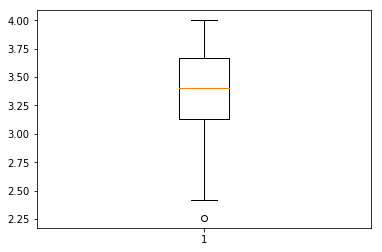

In [55]:
#boxplot 2 
plt.boxplot(df['gpa'])

#### Question 7. What do this plots show?

Answer: 
There are outliers in both gre and gpa boxplots. 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011E6CAC8>]],
      dtype=object)

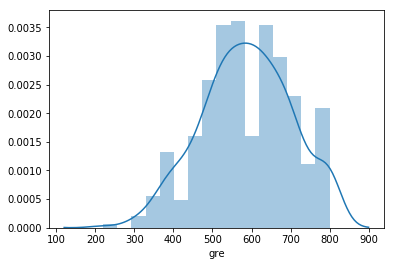

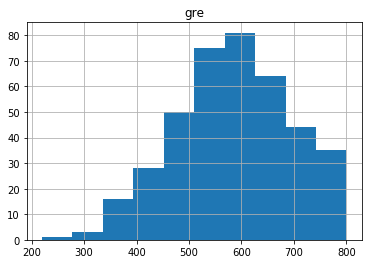

In [63]:
# plot the distribution of each variable 
import seaborn as sns
sns.distplot(df['gre']); df.hist('gre')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011FC5B00>]],
      dtype=object)

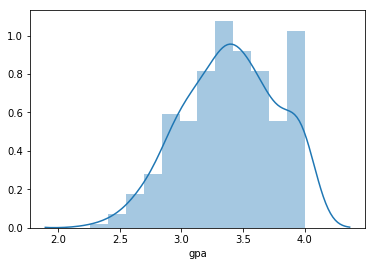

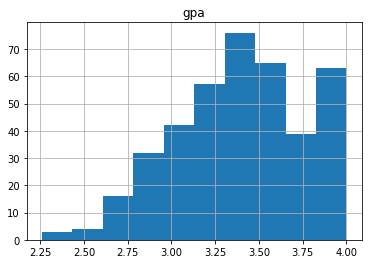

In [64]:
sns.distplot(df['gpa']); df.hist('gpa')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. The disbution is not normal in fact is has "slight" bimodal distribution for both gre and gpa. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes.  

The log transformation can be used to correct the bimodal distribution, because the log transformation can be used to make skewed distribution less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumption of inferential statistics. 

#### Question 11. Which of our variables are potentially colinear? 

In [66]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [ ]:
Answer: 
Covariance interpretation
gre & gpa is 0.382
gpa & admit is 0.174
gre & admit is 0.181
The results indicates that the relationship is positive

prestige & admit is -0.243
prestige & gre is -0.125
prestige & gpa is -0.061
These values indicate that the relationship are negative    

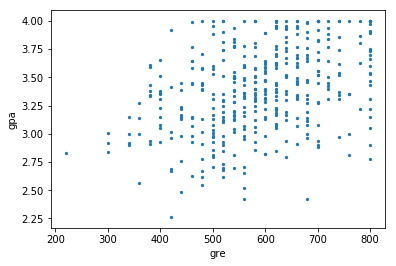

In [67]:
df.plot(kind='scatter', x='gre', y='gpa', marker='.')

#### Question 12. What did you find?

Answer: The correlation table shows there are strong positive relationship between gre and gpa

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Below are the questions needed to be explored if there is an association between grad school admission and prestige of undergraduate schools. 
1) What is the overall admission rate?
2) What prestige school does undergraduate students like the best?
3) Who are the students? 
4) Are there any association between the high prestige school and student admission rate?

Classify the variables into 3 types of variables:
1) Nominal (categorical)
2) continuous (numerical)
3) ordinal (Ordering)
* For this case, both Admit and Prestige are categorical variables

Use data visualization tools visualization:
1) Pie Chart
2) Heatmap
3) Bar chart

Test the colinearity:
Since the admit and prestige are both nominal.The association between nominal (Binominal or multinomial) can be tested via chi square

In [88]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.admit, df.prestige))

(25.25204366934604,
 1.367582045896776e-05,
 3,
 array([[ 41.63979849, 101.02770781,  82.59697733,  45.73551637],
        [ 19.36020151,  46.97229219,  38.40302267,  21.26448363]]))

#### Question 14. What is your hypothesis? 

Answer: 
H0: There is no association between graduate school admission rate and prestige of undergraduate schools
H1: There is an association between graduate school admission rate and prestige of undergraduate schools

Results of Chi-Square Test: 
H1: There are an association between “admit” and “prestige” given the P values is smaller than the 0.05

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [ ]:
There are few ways to impute missing data such as hot deck, cold deck, substitution and regression.

#### 2. Bonus: Log transform the skewed data

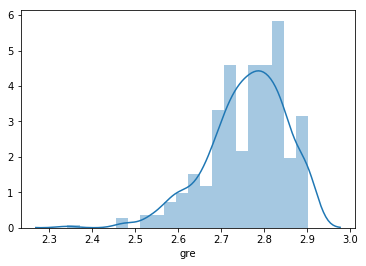

In [78]:
sns.distplot(np.log10(df['gre']));
#sns.distplot(df['gre'])

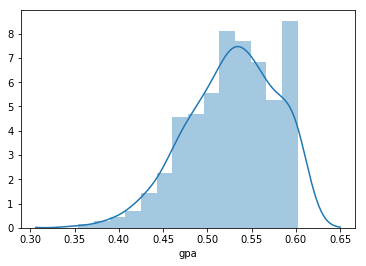

In [83]:
sns.distplot(np.log10(df['gpa']))
#sns.distplot(df['gpa'])

In [ ]:
Answer: There are no significant differences before and after gpa log transformation. Having said that, the "slight" 
bump might disappeared if we collect more data (larger sample size).

#### 3. Advanced: Impute missing data

In [ ]:
Answer: 
For this case study, i would recommend to use mean substition due to small amount of missing data in this dataset. 

This method allow us to utilize the collected data in an incomplete dataset. Essentially, the objective of using mean substitution 
is that the mean is a reasonable estimate for a randomly selected observation from a normal distribution. In addition to that, 
this method could help in creating a better normal distribution curve for this case study. 